学年クラス：3C　学籍番号：b2181930　氏名：西村貴志

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import sklearn
%precision 3

'%.3f'

***
# 演習1.
k-means法は、与えられたクラスタ数k個に分類し、各データとクラスタの中心の距離が最も近くなるように割り当てるアルゴリズムである。
***

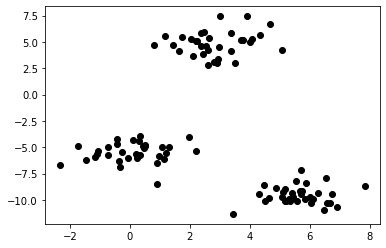

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, _ = make_blobs(random_state=10)
plt.scatter(X[:,0],X[:,1],color='black')

In [3]:
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

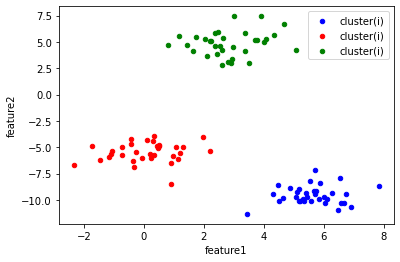

In [4]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster(i)', ax=ax)

***
# 演習2.

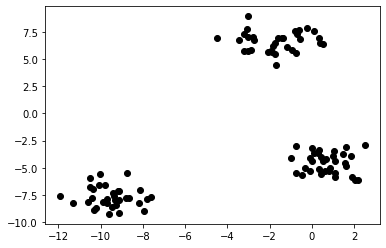

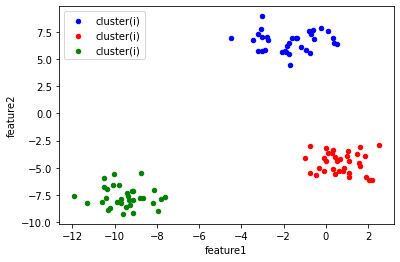

In [5]:
X, _ = make_blobs(random_state=100)
plt.scatter(X[:,0],X[:,1],color='black')

kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster(i)', ax=ax)

***

In [6]:
import requests, zipfile
import io
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(zip_file_url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
print('データ形式（X,y):{}'.format(bank.shape))
print('欠損データ数:{}'.format(bank.isnull().sum().sum()))

データ形式（X,y):(45211, 17)
欠損データ数:0


In [9]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age','balance','campaign','previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

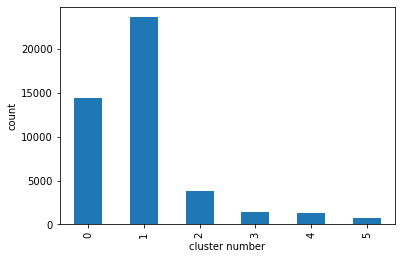

In [10]:
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

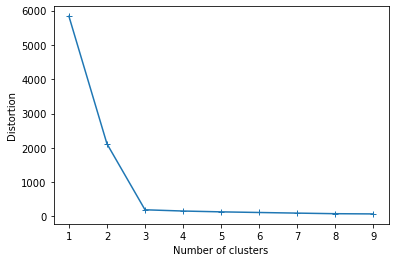

In [11]:
dist_list = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='random', random_state=0)
  kmeans.fit(X)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

***
# 演習3.

Text(0, 0.5, 'Distortion')

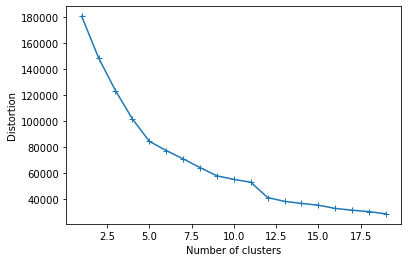

In [12]:
dist_list = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='random', random_state=0)
  kmeans.fit(bank_sub_std)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

***

In [13]:
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,1
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,1


In [14]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3475,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,170,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [15]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

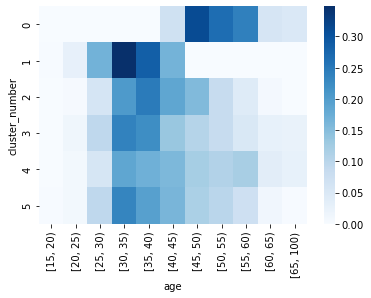

In [16]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [17]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,528,651,2723,2005,476,1072,3,2048,432,154
1,3005,5385,698,409,4932,55,820,2474,812,4256,687,75
2,392,862,146,108,896,60,139,371,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

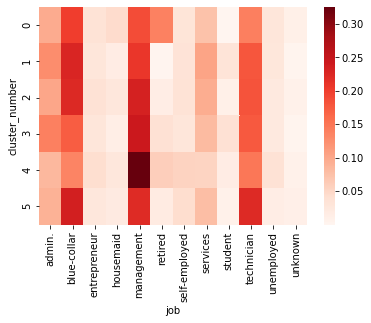

In [18]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1), cmap = 'Reds')

***
# 演習4.
主成分分析は、相関のある多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成し、多次元データのもつ情報をできるだけ損わずに低次元空間に情報を縮約するものである。
***

相関係数: 0.889


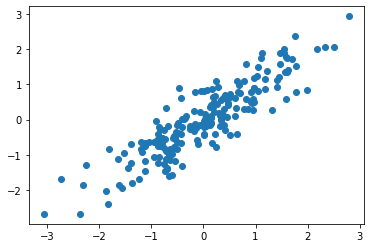

In [19]:
from sklearn.preprocessing import StandardScaler
sample = np.random.RandomState(1)
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T
sc = StandardScaler()
X_std = sc.fit_transform(X)
print('相関係数: {:.3f}'.format(sp.stats.pearsonr(X_std[:,0], X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [21]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [22]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [23]:
print('各主成分の分散割合]{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合][0.945 0.055]


(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

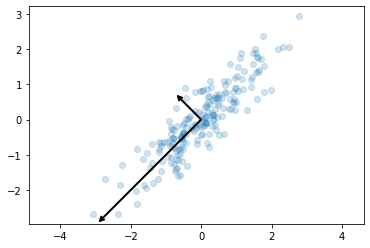

In [24]:
arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
  plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:,0], X_std[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

***
# 演習5.

相関係数: 0.779


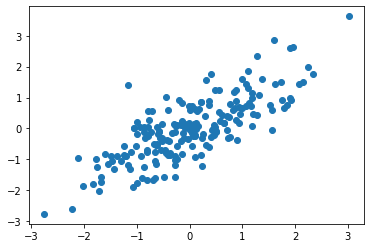

In [25]:
sample = np.random.RandomState(100)
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T
sc = StandardScaler()
X_std = sc.fit_transform(X)
print('相関係数: {:.3f}'.format(sp.stats.pearsonr(X_std[:,0], X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [26]:
pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [27]:
print(pca.components_)

[[ 0.707  0.707]
 [-0.707  0.707]]


In [28]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.788 0.222]


In [29]:
print('各主成分の分散割合]{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合][0.89 0.11]


(-3.042415421230955,
 3.2997773156676162,
 -3.0856590849186647,
 3.950769628105806)

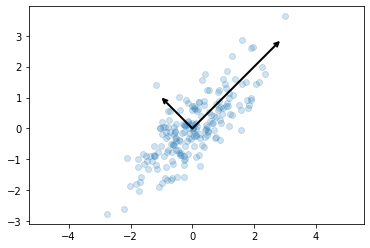

In [30]:
arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

plt.scatter(X_std[:,0], X_std[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

***

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

In [ ]:
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins = 50)
  ax[i].hist(malignant[:,i], bins, alpha = .5)
  ax[i].hist(benign[:,i], bins, alpha = .5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis = 1)
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

In [ ]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)

In [31]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)

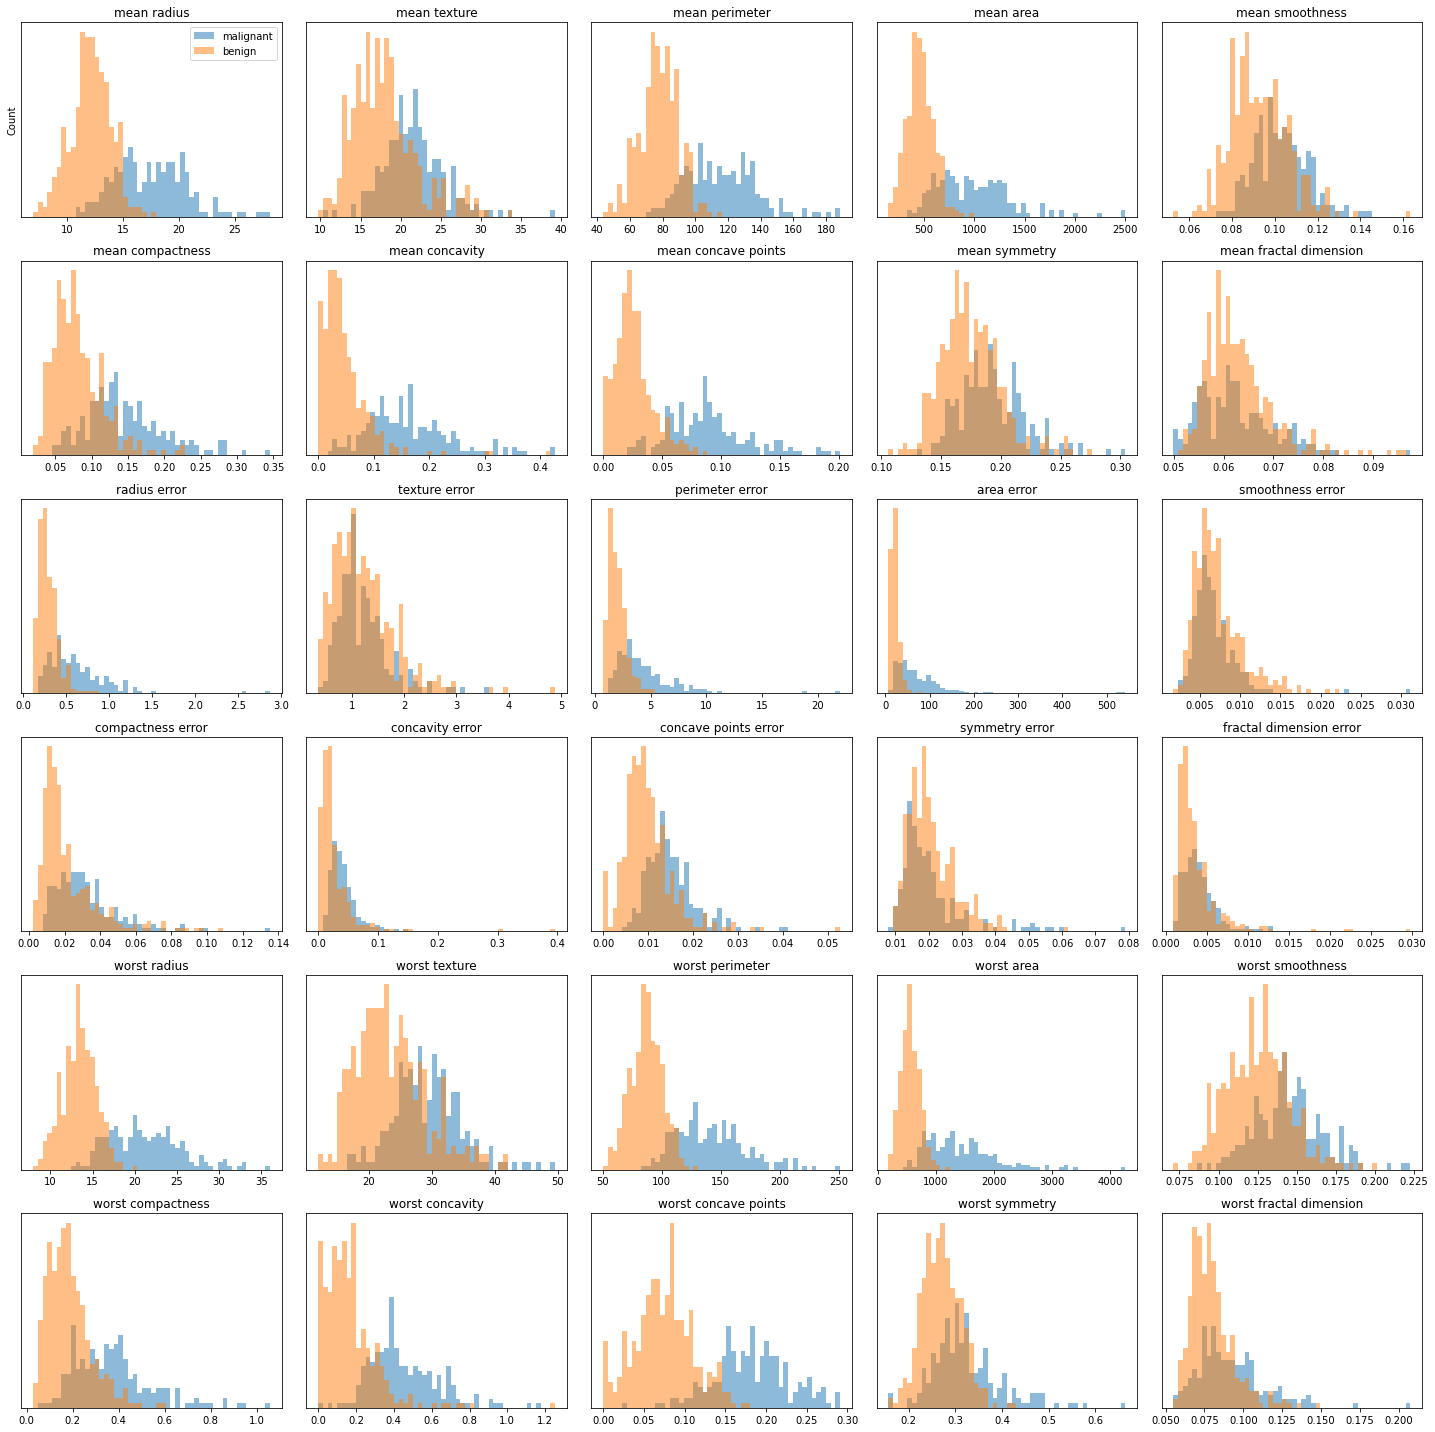

In [32]:
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins = 50)
  ax[i].hist(malignant[:,i], bins, alpha = .5)
  ax[i].hist(benign[:,i], bins, alpha = .5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [33]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [34]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis = 1)
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

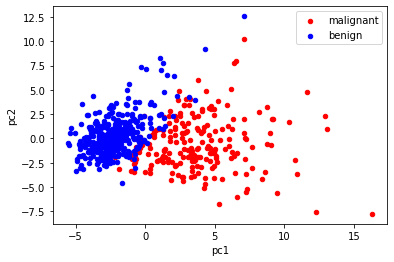

In [35]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)